In [246]:
import pulp as lp
# 资源转换途径
recipe = {
    '开始游戏':{'游戏日':-1,'签到日':1,'日常日':1,'周常日':1,'免费通行证日':1,'付费通行证日':1,'基建日':1,'作战日':1,'商店日':1,'体力':12*24-50,'好感':240},

    '每日任务':{'日常日':-1,'好感':100,'基础检索指令':1,'底格币':3000,'经验':1400,'体力':100},
    '每周任务':{'周常日':-7,'好感':575,'基础检索指令':3,'体力':100,'底格币':5000,'经验':1800,'算法效率':360},
    '每月签到':{'签到日':-30,'好感':315,'底格币':35500,'经验':12500,'技能样本':300,'基础检索指令':2,'算法效率':220},
    '免费通行证':{
        '免费通行证日':-35,'底格币':15000,'技能样本':2500,'紫突破':40,'蓝突破':20,'绿突破':20,'白突破':20,
        '经验':32000,'体力':250,'算法效率':500,'好感':250,'技能枢核':5
    },
    # '付费通行证':{
    #     '付费通行证日':-35,'底格币':50000,'技能样本':5000,
    #     '经验':132000,'体力':500,'算法效率':5000,'好感':625,'技能枢核':15
    # },

    '基建':{'基建日':-1,'底格币':500*4*24,'预制件':1500,'基础检索指令':24*0.8,'通用工时':24+16,'指令工时':24,'礼物工时':24,'数据工时':24},
    '预制件生产':{'通用工时':-1,'预制件':25},
    '加速指令':{'通用工时':-1,'指令工时':1},
    '加速礼物':{'通用工时':-1,'礼物工时':1},
    '加速数据':{'通用工时':-1,'数据工时':1},
    '指令生产':{'指令工时':-1,'基础检索指令':60/72.5},
    '模块生产':{'指令工时':-1,'预制件':-2000,'算法效率':2000},
    '模块生产(空转)':{'指令工时':-1,'算法效率':100/4.05},
    '礼物生产':{'礼物工时':-1,'好感':20},
    '枢核生产':{'数据工时':-1,'预制件':-300/8,'技能枢核':1/8},
    '枢核生产(空转)':{'数据工时':-1,'技能枢核':1/20},
    '技能箱生产':{'数据工时':-1,'预制件':-100/2,'底格币':-6000/2,'技能枢核':0.106/2,'技能样本':173.4/2},
    '技能箱生产(空转)':{'数据工时':-1,'底格币':-6000/6,'技能枢核':0.106/6,'技能样本':173.4/6},

    '双倍机会':{'作战日':-7,'双倍经验本门票':6,'双倍金币本门票':6,'双倍技能本门票':6,'双倍突破本门票':10},
    '双倍经验本':{'双倍经验本门票':-1,'体力':-30,'好感':64,'经验':18000},
    '双倍金币本':{'双倍金币本门票':-1,'体力':-30,'好感':64,'底格币':18000},
    '双倍技能本':{'双倍技能本门票':-1,'体力':-30,'好感':64,'技能样本':1560},
    '双倍突破本':{'双倍突破本门票':-1,'体力':-30,'好感':64,'金突破':5,'紫突破':5,'蓝突破':3,'绿突破':4,'白突破':4},
    '经验本':{'体力':-30,'好感':64,'经验':9000},
    '金币本':{'体力':-30,'好感':64,'底格币':9000},
    '技能本':{'体力':-30,'好感':64,'技能样本':780},
    '突破本':{'体力':-30,'好感':64,'金突破':5/2,'紫突破':5/2,'蓝突破':3/2,'绿突破':4/2,'白突破':4/2},
    '刷枢核':{'体力':-12.5,'技能枢核':1},
    '算法本':{'体力':-30,'好感':64,'蓝算法':2.0,'紫算法':1.0,'紫套装':1.9,'金算法':0.7},
    '吃蓝算法':{'蓝算法':-1,'算法效率':3},
    '吃紫算法':{'紫算法':-1,'算法效率':7},
    '拆紫算法':{'紫算法':-1,'算法碎片':2,'底格币':200},
    '吃紫套装':{'紫套装':-1,'算法效率':15},
    '拆紫套装':{'紫套装':-1,'算法碎片':2,'底格币':200},
    '吃金算法':{'金算法':-1,'算法效率':13},
    '拆金算法':{'金算法':-1,'算法碎片':7,'底格币':500},
    
    '助战商店':{'商店日':-7,'技能枢核':3,'经验':(200*7-740)*30},
    '基础检索':{
        '基础检索指令':-1,
        '指令工时':85*2/60/1500,'礼物工时':15*6/60/1500+61*4/60/1500*1/3,'数据工时':61*4/60/1500*2/3,
        '经验':229900/1500,'好感':14565/1500,
        '金突破':83/1500,'紫突破':151/1500,'蓝突破':90/1500,'绿突破':79/1500,'白突破':46/1500,
    },
    '人形养成':{
        '养成角色':1,'经验':-213540,'底格币':-129500,'技能样本':-23240,'技能枢核':-48,'好感':-13570,'算法效率':-6900,
        '金突破':-30,'紫突破':-40,'蓝突破':-30,'绿突破':-20,'白突破':-10,
    },
}

# 各项收支公式
var = {}
count = {}
for v, r in recipe.items():
    var[v] = lp.LpVariable(v,0)
    for i, c in r.items():
        count.setdefault(i,0)
        count[i] += c*var[v]

# 定义问题
problem = lp.LpProblem('养成计算',lp.LpMaximize)
count['游戏日'] += 30
count['养成角色'] -= 4
problem += var['算法本']+var['基础检索']*1000
for k, v in count.items():
    problem += v>=0,k 

# 求解
if problem.solve() == 1:
    print('人形养成',var['人形养成'].value(),sep='\t')
    print('基础检索',var['基础检索'].value(),sep='\t')
    print('算法本',var['算法本'].value(),sep='\t')
    print('=====================')
    for k, v in var.items():
        if v.value()>0.001:
            print(k, v.value(),sep='\t')
    for k, v in count.items():
        print(k, problem.constraints[k].pi/problem.constraints['体力'].pi,sep='\t')
else:
    print('unsolvable')

人形养成	4.0
基础检索	2202.7522
算法本	234.15186
开始游戏	30.0
每日任务	30.0
每周任务	4.2857143
每月签到	1.0
免费通行证	0.85714286
基建	30.0
加速指令	1200.0
指令生产	1911.4565
模块生产	12.704286
礼物生产	724.19339
枢核生产	41.644444
枢核生产(空转)	321.74159
技能箱生产	360.59524
双倍机会	4.2857143
双倍经验本	19.002862
双倍技能本	25.714286
技能本	24.5375
刷枢核	134.45296
算法本	234.15186
助战商店	4.2857143
基础检索	2202.7522
人形养成	4.0
游戏日	2214706.8521470684
签到日	2096.4257309642576
日常日	30151.683301516834
周常日	13533.31693533317
免费通行证日	191.47901291479013
付费通行证日	0.0
基建日	2168460.1416846015
作战日	25.71428605714286
商店日	10.071428800714289
体力	1.0
好感	0.0
基础检索指令	30047.226300472263
底格币	0.0007073718070737181
经验	0.001666666696666667
算法效率	12.458335324583354
技能样本	0.0384615393846154
紫突破	0.0
蓝突破	0.0
绿突破	0.0
白突破	0.0
技能枢核	12.500000225000003
预制件	0.02500000015
通用工时	24866.67084866671
指令工时	24866.67084866671
礼物工时	0.0
数据工时	0.6249999962499999
双倍经验本门票	0.0
双倍金币本门票	0.0
双倍技能本门票	30.000000300000004
双倍突破本门票	0.0
金突破	0.0
养成角色	87903.86487903865


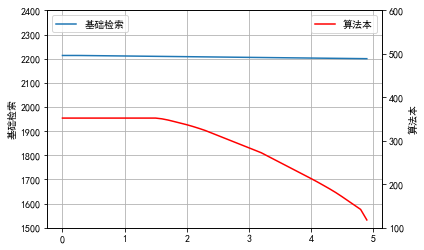

In [181]:
import pulp as lp 
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

def compute(target = 3):
    var = {}
    count = {}
    for v, r in recipe.items():
        var[v] = lp.LpVariable(v,0)
        for i, c in r.items():
            count.setdefault(i,0)
            count[i] += c*var[v]
    problem = lp.LpProblem('养成计算',lp.LpMaximize)
    count['游戏日'] += 30
    count['养成角色'] -= target
    for k, v in count.items():
        problem += v>=0,k 
    problem += var['基础检索']*10000+var['算法本']
    if problem.solve() == 1:
        return var['人形养成'].value(),var['基础检索'].value(),var['算法本'].value()
    else:
        return None

res = []
for i in np.arange(0,5,0.1):
    r = compute(i)
    if r is None:
        break
    res.append(r)
res = np.array(res)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(res[:,0], res[:,1], '-', label = '基础检索')
ax.set_ylabel(r"基础检索")
ax.set_ylim(1500,2400)
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(res[:,0], res[:,2], '-r', label = '算法本')
ax2.set_ylabel(r"算法本")
ax2.set_ylim(100,600)
ax2.legend(loc=1)
ax.grid()

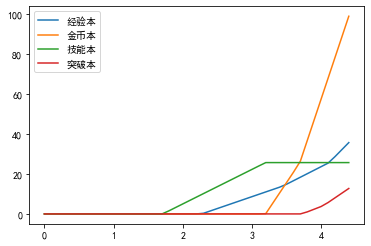

In [150]:
import pulp as lp 
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

def compute(target = 3):
    var = {}
    count = {}
    for v, r in recipe.items():
        var[v] = lp.LpVariable(v,0)
        for i, c in r.items():
            count.setdefault(i,0)
            count[i] += c*var[v]
    problem = lp.LpProblem('养成计算',lp.LpMaximize)
    count['游戏日'] += 30
    count['养成角色'] -= target
    for k, v in count.items():
        problem += v>=0,k 
    problem += var['基础检索']*10000+var['算法本']
    if problem.solve() == 1:
        return var['人形养成'].value(),var['双倍经验本'].value()+var['经验本'].value(),\
        var['双倍金币本'].value()+var['金币本'].value(),var['双倍技能本'].value()+var['技能本'].value(),var['双倍突破本'].value()+var['突破本'].value()
    else:
        return None

res = []
for i in np.arange(0,5,0.1):
    r = compute(i)
    if r is None:
        break
    res.append(r)
res = np.array(res)
plt.plot(res[:,0],res[:,1],label='经验本')
plt.plot(res[:,0],res[:,2],label='金币本')
plt.plot(res[:,0],res[:,3],label='技能本')
plt.plot(res[:,0],res[:,4],label='突破本')
plt.legend()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(res[:,0], res[:,1], '-', label = '基础检索')
# ax.set_ylabel(r"基础检索")
# ax.set_ylim(1500,2400)
# ax.legend(loc=2)

# ax2 = ax.twinx()
# ax2.plot(res[:,0], res[:,2], '-r', label = '算法本')
# ax2.set_ylabel(r"算法本")
# ax2.set_ylim(200,600)
# ax2.legend(loc=1)
# ax.grid()